# A Category Based Model

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PowerTransformer

import support_victor_machine as supp

In [3]:
data = pd.read_csv('../data/transactions_train.csv')

data.dtypes

t_dat                object
customer_id          object
article_id            int64
price               float64
sales_channel_id      int64
dtype: object

In [4]:
data['Date'] = pd.to_datetime(data['t_dat'])

In [5]:
data.tail()

,t_dat,customer_id,article_id,price,sales_channel_id,Date
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2,2020-09-22
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2,2020-09-22
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1,2020-09-22
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1,2020-09-22
31788323,2020-09-22,fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20...,898573003,0.033881,2,2020-09-22


In [ ]:
# look at the the very last month's worth of transactions
most_recent = data[ data['Date'] > '2020-08-21' ]

most_recent

,t_dat,customer_id,article_id,price,sales_channel_id,Date
30597413,2020-08-22,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,913688003,0.033881,2,2020-08-22
30597414,2020-08-22,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,913688003,0.033881,2,2020-08-22
30597415,2020-08-22,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,923460001,0.042356,2,2020-08-22
30597416,2020-08-22,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,934380001,0.050831,2,2020-08-22
30597417,2020-08-22,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,913688001,0.033881,2,2020-08-22
...,...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2,2020-09-22
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2,2020-09-22
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1,2020-09-22
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1,2020-09-22


In [12]:
articles = pd.read_csv('../data/articles.csv')

articles.dtypes

article_id                       int64
product_code                     int64
prod_name                       object
product_type_no                  int64
product_type_name               object
product_group_name              object
graphical_appearance_no          int64
graphical_appearance_name       object
colour_group_code                int64
colour_group_name               object
perceived_colour_value_id        int64
perceived_colour_value_name     object
perceived_colour_master_id       int64
perceived_colour_master_name    object
department_no                    int64
department_name                 object
index_code                      object
index_name                      object
index_group_no                   int64
index_group_name                object
section_no                       int64
section_name                    object
garment_group_no                 int64
garment_group_name              object
detail_desc                     object
dtype: object

In [37]:
features = ['article_id', 'product_type_name', 'product_group_name', 'graphical_appearance_name', 'colour_group_name',
                'perceived_colour_value_name', 'perceived_colour_master_name', 'department_name', 'index_name', 'index_group_name',
                'section_name', 'garment_group_name']


In [38]:
most_recent_sales = most_recent.value_counts('article_id')

most_recent_sales

article_id
751471001    3080
915529003    2582
915526001    2573
918292001    2565
706016001    2565
             ... 
624543023       1
697050008       1
739144007       1
809570003       1
603584020       1
Length: 29548, dtype: int64

In [39]:
most_recent_sales_df = most_recent_sales.reset_index().rename(columns={0:'sales'})

most_recent_sales_df.head()

,article_id,sales
0,751471001,3080
1,915529003,2582
2,915526001,2573
3,918292001,2565
4,706016001,2565


In [40]:
most_recent_sales_meta_df = most_recent_sales_df.merge(right = articles[features], how = 'left', on='article_id')

most_recent_sales_meta_df.head()

,article_id,sales,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name
0,751471001,3080,Trousers,Garment Lower body,Solid,Black,Dark,Black,Trouser,Ladieswear,Ladieswear,Womens Everyday Collection,Trousers
1,915529003,2582,Sweater,Garment Upper body,Solid,Black,Dark,Black,Knitwear,Ladieswear,Ladieswear,Womens Everyday Collection,Knitwear
2,915526001,2573,Sweater,Garment Upper body,Solid,Off White,Dusty Light,White,Knitwear,Ladieswear,Ladieswear,Womens Everyday Collection,Knitwear
3,918292001,2565,Leggings/Tights,Garment Lower body,Melange,Black,Dark,Black,Ladies Sport Bottoms,Sport,Sport,Ladies H&M Sport,Jersey Fancy
4,706016001,2565,Trousers,Garment Lower body,Solid,Black,Dark,Black,Trousers,Divided,Divided,Divided Collection,Trousers


In [41]:
# look at the the very last month's worth of transactions
aug_2020 = data[ (data['Date'] > '2020-07-21') & (data['Date'] < '2020-08-21') ]

aug_2020

,t_dat,customer_id,article_id,price,sales_channel_id,Date
29314980,2020-07-22,0000c97821eb48d0e590fd309133f0a6c08f7750f64ccc...,778064038,0.008458,2,2020-07-22
29314981,2020-07-22,0000c97821eb48d0e590fd309133f0a6c08f7750f64ccc...,817166007,0.006763,2,2020-07-22
29314982,2020-07-22,0000c97821eb48d0e590fd309133f0a6c08f7750f64ccc...,840360002,0.008458,2,2020-07-22
29314983,2020-07-22,0000c97821eb48d0e590fd309133f0a6c08f7750f64ccc...,817166003,0.008458,2,2020-07-22
29314984,2020-07-22,00061a04f030bdf3665b09829192ca8c13c4de6dd9ae9d...,624486001,0.012729,2,2020-07-22
...,...,...,...,...,...,...
30563495,2020-08-20,fffcd4487ba8b7344dcd258c43cc6625397ca9e7aee005...,833499005,0.025407,2,2020-08-20
30563496,2020-08-20,fffe7116f9f68e8ad287fd7b6e33aad4871d7080e77d2d...,896169002,0.042695,2,2020-08-20
30563497,2020-08-20,fffe7116f9f68e8ad287fd7b6e33aad4871d7080e77d2d...,896152003,0.028458,2,2020-08-20
30563498,2020-08-20,ffff61677073258d461e043cc9ed4ed97be5617a920640...,810746001,0.018627,1,2020-08-20


In [142]:
aug2020_sales = aug_2020.value_counts(subset='article_id')

aug2020_sales

article_id
464297007    1703
759871002    1664
706016001    1627
372860002    1617
706016003    1581
             ... 
783707065       1
783707066       1
783707168       1
783732002       1
803518003       1
Length: 30010, dtype: int64

In [43]:
aug2020_sales_df = aug2020_sales.reset_index().rename(columns={0:'sales'})

aug2020_sales_df

,article_id,sales
0,464297007,1703
1,759871002,1664
2,706016001,1627
3,372860002,1617
4,706016003,1581
...,...,...
30005,783707065,1
30006,783707066,1
30007,783707168,1
30008,783732002,1


In [75]:
aug2020_sales_df[ aug2020_sales_df['sales'] >= 10]

,article_id,sales
0,464297007,1703
1,759871002,1664
2,706016001,1627
3,372860002,1617
4,706016003,1581
...,...,...
13600,791499002,10
13601,856847003,10
13602,809517001,10
13603,866153002,10


In [44]:
aug2020_sales_meta_df = aug2020_sales_df.merge(right = articles[features], how = 'left', on='article_id')

aug2020_sales_meta_df.head()

,article_id,sales,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name
0,464297007,1703,Underwear bottom,Underwear,Placement print,Black,Dark,Black,Casual Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear"
1,759871002,1664,Vest top,Garment Upper body,Solid,Black,Dark,Black,EQ Divided Basics,Divided,Divided,Divided Complements Other,Jersey Basic
2,706016001,1627,Trousers,Garment Lower body,Solid,Black,Dark,Black,Trousers,Divided,Divided,Divided Collection,Trousers
3,372860002,1617,Socks,Socks & Tights,Solid,White,Light,White,Shopbasket Socks,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights
4,706016003,1581,Trousers,Garment Lower body,Solid,Dark Blue,Medium Dusty,Blue,Trousers,Divided,Divided,Divided Collection,Trousers


---

<br>

The idea is to try and use qualitative attributes of products to predict the sales figures for the next month. The models we believe to be most suited for such a task are the tree-based ensemble models. As such, let us begin with one such model: The Random Forest.

In [45]:
# shuffle rows
aug2020_sales_meta_df = aug2020_sales_meta_df.sample(frac=1)
most_recent_sales_meta_df = most_recent_sales_meta_df.sample(frac=1)

In [46]:
train_df = pd.concat([aug2020_sales_meta_df, most_recent_sales_meta_df])

train_df.head()

,article_id,sales,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name
17785,742911001,4,Socks,Socks & Tights,Solid,Grey,Dusty Light,Grey,Baby Socks,Baby Sizes 50-98,Baby/Children,Baby Essentials & Complements,Socks and Tights
25798,724720002,1,Vest top,Garment Upper body,Solid,Green,Dusty Light,Green,Tops Fancy Jersey,Divided,Divided,Divided Collection,Jersey Fancy
1663,912204005,187,Vest top,Garment Upper body,Solid,Pink,Medium,Pink,Ladies Sport Bras,Sport,Sport,Ladies H&M Sport,Jersey Fancy
9579,885468002,21,Dress,Garment Full body,All over pattern,Light Beige,Dusty Light,Beige,Blouse & Dress,Ladieswear,Ladieswear,Womens Trend,Blouses
21567,627408001,2,Dress,Garment Full body,Lace,Off White,Dusty Light,White,Jersey Occasion,Ladieswear,Ladieswear,Womens Premium,Dresses Ladies


In [96]:
pt = PowerTransformer(method='box-cox')

In [105]:
train_size = aug2020_sales_meta_df.shape[0]

X = train_df.drop(columns=['article_id', 'sales'])
y = train_df[['sales']]

X = pd.get_dummies(X)

X_train = X.iloc[0:train_size]
y_train = y.iloc[0:train_size]
y_pt_train = pt.fit_transform(y_train)

X_test = X.iloc[train_size: ]
y_test = y.iloc[train_size: ]


In [106]:
X_train.shape

(30010, 578)

In [109]:
y_pt_train = y_pt_train.reshape(len(y_pt_train),)

y_pt_train

array([-0.37829653, -1.38175455,  1.57808593, ..., -1.38175455,
       -0.85592962,  0.70398355])

In [116]:
y_pt_test = pt.transform(y_test).reshape(len(y_test),)

y_pt_test

array([ 0.29067751, -0.37829653,  1.47000307, ...,  1.92195336,
        1.73701414, -0.11945799])

In [136]:
rf = RandomForestRegressor(n_estimators=1800, max_depth=31, n_jobs=7)

rf.fit(X_train, y_pt_train)

RandomForestRegressor(max_depth=31, n_estimators=1800, n_jobs=7)

In [137]:
rf.score(X_train, y_pt_train), rf.score(X_test, y_pt_test)

(0.46617312977426717, 0.17831428161161744)

In [138]:
train_preds = pt.inverse_transform(rf.predict(X_train).reshape(len(y_train),1))
test_preds = pt.inverse_transform(rf.predict(X_test).reshape(len(y_test),1))

mean_squared_error(y_train, train_preds, squared=False), mean_squared_error(y_test, test_preds, squared=False)

C:\Users\herma\Anaconda3\envs\pytorch1.11\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
C:\Users\herma\Anaconda3\envs\pytorch1.11\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


(99.22174536154877, 121.17505572982483)

In [139]:
mean_absolute_error(y_train, train_preds), mean_absolute_error(y_test, test_preds)

(34.26558875653328, 36.68893023303841)

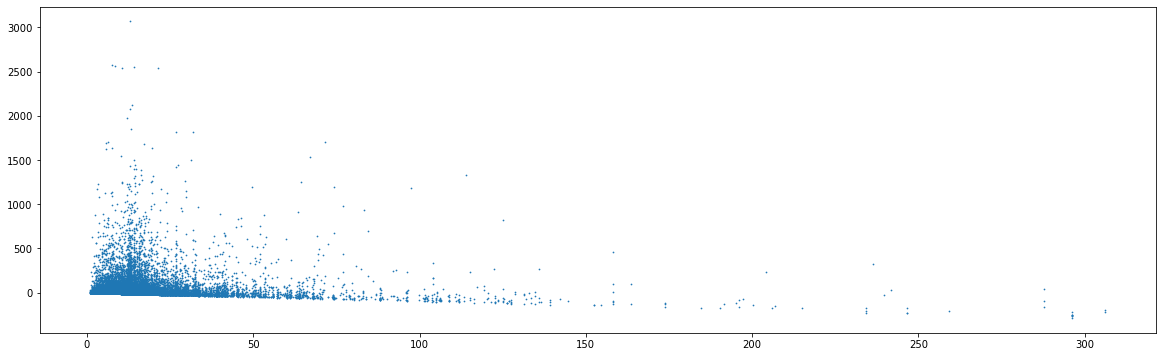

In [140]:
residuals = y_test-test_preds

plt.figure(figsize=(20,6));
plt.scatter(x=test_preds, y = residuals, s=0.5);

In [141]:
residuals.describe()

,sales
count,29548.000000
mean,28.123526
std,117.868281
min,-286.132417
25%,-5.284597
50%,-0.310183
75%,13.378308
max,3067.195084


In [143]:
baseline = pd.DataFrame({'aug':aug2020_sales, 'recent':most_recent_sales})

baseline

,aug,recent
article_id,,
108775015,1.0,NaN
108775044,24.0,19.0
110065001,1.0,NaN
110065002,3.0,NaN
110065011,NaN,2.0
...,...,...
952267001,NaN,41.0
952938001,NaN,9.0
953450001,NaN,17.0
